<a href="https://colab.research.google.com/github/Samarthca/Amazon-books-EDA/blob/main/Sentiment_analysis_of_amazon_products_by_VADER_%26_naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -- vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.1 MB/s eta 0:00:00


In [2]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Using file operation glob to read .json file from the respected path
file=glob.glob('All_Beauty.json')

In [4]:
# Reading a multiple json files from a single json file 'ReviewSample.json'.
review = []
with open(file[0]) as data_file:
    data = data_file.read()
    for i in data.split('\n'):
        review.append(i)
# print(review)
# Making a list of Tuples containg all the data of json files.
reviewDataframe = []
for x in review:
    try:
        jdata=json.loads(x)
        # print(jdata)
        reviewDataframe.append((jdata['reviewerID'], jdata['asin'], jdata['reviewerName'], jdata['reviewTime'],
                               jdata['summary'], jdata['verified'], jdata['reviewText'], jdata['unixReviewTime'], jdata['overall']))
    except:
        pass
# print(reviewDataframe)

# Creating a dataframe using the list of Tuples got in the previous step.
dataset=pd.DataFrame(reviewDataframe,columns=['ReviewerID','Asin','Reviewer_Name','Review_Time','Summary', 'Verified' ,'Review_Text','Unix_ReviewTime', 'Rating'])
# print(dataset)

In [5]:
dataset.size
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15971 entries, 0 to 15970
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReviewerID       15971 non-null  object 
 1   Asin             15971 non-null  object 
 2   Reviewer_Name    15971 non-null  object 
 3   Review_Time      15971 non-null  object 
 4   Summary          15971 non-null  object 
 5   Verified         15971 non-null  bool   
 6   Review_Text      15971 non-null  object 
 7   Unix_ReviewTime  15971 non-null  int64  
 8   Rating           15971 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1013.9+ KB


In [6]:
#Naive Bayes function to perform sentiment analysis
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

In [7]:
# VADER sentiment analysis tool for getting Compound score. 
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [8]:
#Only  1 Lakh (1,00,000) reviews is considered in a new DataFrame 'Selected_Rows' for Sentiment Analysis so that jupyter notebook
#dosen't crash.
#Sentiment value is calculated for each review and stored in the new column 'Sentiment_Score' of DataFrame 'Selected_Rows'.

Selected_Rows=dataset.head(100000)
Selected_Rows['Sentiment_Score']=Selected_Rows['Review_Text'].apply(lambda x: sentimental_Score(x))

In [9]:
pos = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'pos']
neg = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'neg']

In [10]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

In [11]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Summary"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [12]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [13]:
#Generate a word cloud image of height=500 and width=900 for positives and negatives
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

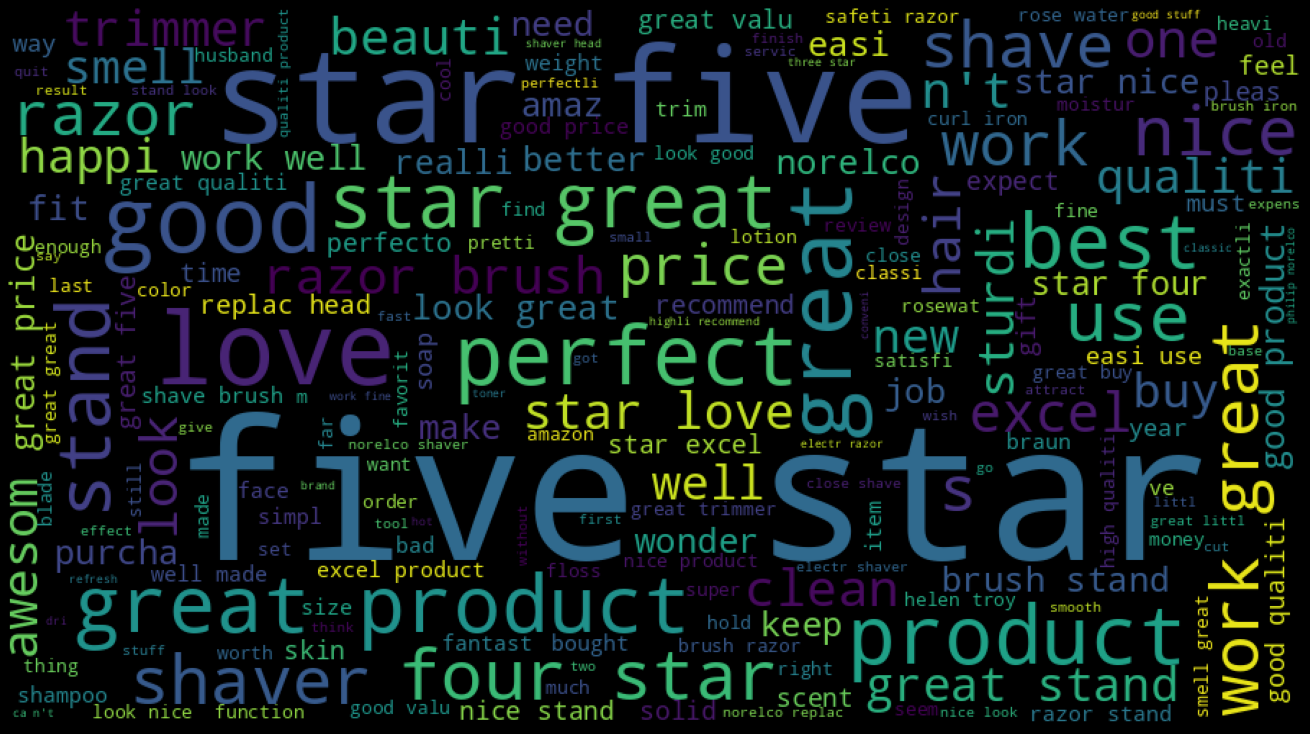

<Figure size 432x288 with 0 Axes>

In [14]:
#Positive review wordcloud
plot_Cloud(pos_wordcloud)

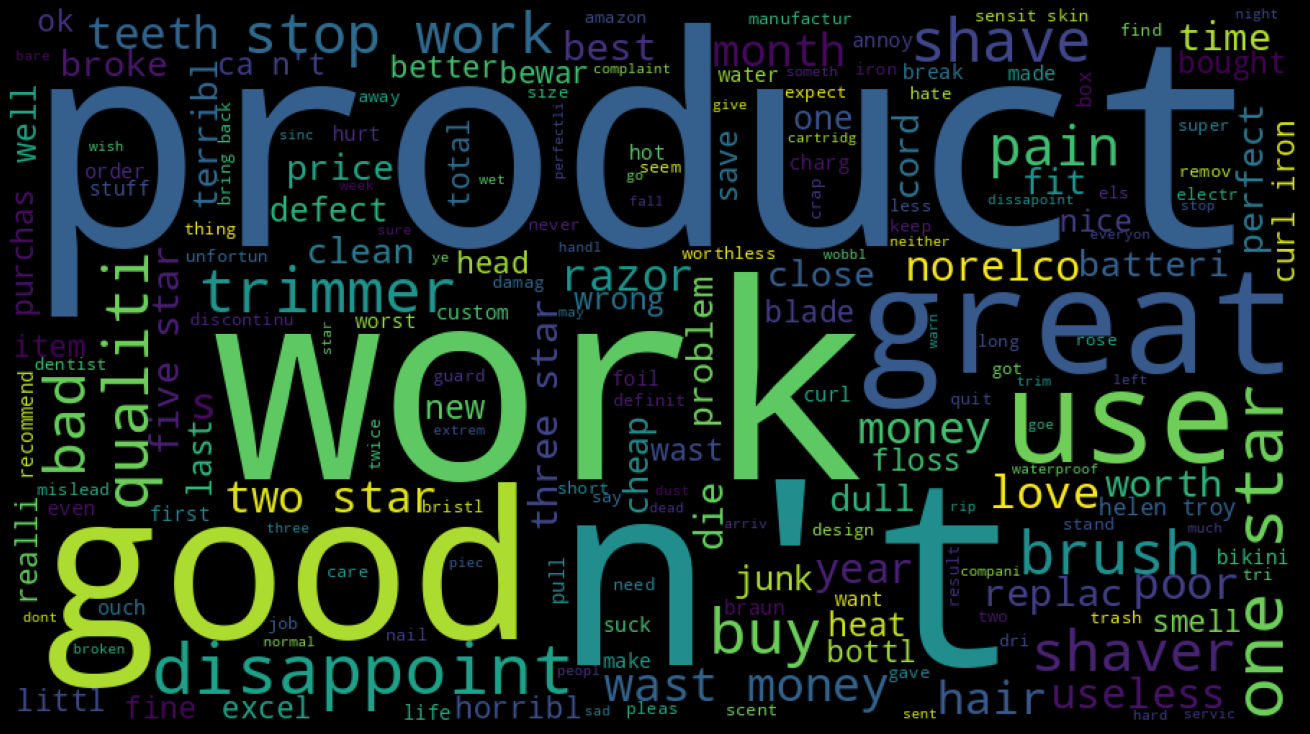

<Figure size 432x288 with 0 Axes>

In [15]:
#Negative review wordcloud
plot_Cloud(neg_wordcloud)

In [16]:
#Consider the product or meta data of consisting of product details. REad the .json files
file2=glob.glob('meta_All_Beauty.json')

In [17]:
# Reading a multiple json files from a single json file 'ProductSample.json'.
product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)
        
# Firstly cleaning the data by converting files into proper json format files by some replacements and 
# then Making a list of Tuples containg all the data of json files.        
productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['title'])) 
    except:
        pass

In [18]:
# Reading a multiple json files from a single json file 'ProductSample.json'.
product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)
        
# Firstly cleaning the data by converting files into proper json format files by some replacements and 
# then Making a list of Tuples containg all the data of json files.        
productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['title'])) 
    except:
        pass

In [19]:
# Creating a dataframe using the list of Tuples got in the previous step.     
Product_dataset=pd.DataFrame(productDataframe,columns=['Asin','Title'])  

In [20]:
#Considering the 2 columns that helps know about the sentiment of the reviews
Sentimemt_Score_Product=Selected_Rows[['Asin','Sentiment_Score']]

In [21]:
#Group the generated data based on certain required features and 
#calculate the count of all the products with positive, negative and neutral sentiment Score
Sentimemt_Score_Product=Sentimemt_Score_Product.groupby(['Asin','Sentiment_Score']).size().reset_index()

In [22]:
# Creating a new column with value of 'Sentimemt_Score_Product[0]' so that it is accessible with the index name.
Sentimemt_Score_Product['Count']=Sentimemt_Score_Product[0]

# Taking the Required columns only.
Sentimemt_Score_Product=Sentimemt_Score_Product[['Asin','Sentiment_Score','Count']]

In [23]:
#Sort the values in ascending order of the reviews generated
data1 = Sentimemt_Score_Product.sort_values(['Asin','Count'],ascending=True).groupby(['Asin']).head()

In [24]:
#Creating a copy of Product dataset generated
data2 = Product_dataset

In [25]:
#Merge two datset on the basis of the Asin value that is unique code for each product generated as a SKU value
result=pd.merge(data2, data1, on='Asin', how='inner')

In [26]:
#Dump the result data generated after merging to a .csv file format
result.to_csv('Sentiment_Distribution_Across_Product.csv')

In [27]:
# Selecting the rows whose sentiment is positive
Positive=result[result.Sentiment_Score =='pos']

# Selecting the rows whose sentiment is negative
Negative=result[result.Sentiment_Score =='neg']

# Selecting the rows whose sentiment is neutral
Neutral=result[result.Sentiment_Score =='neu']

In [28]:
#sorting the values generating total count of similar reviews in the entire datset of 3 different set of reviews
result_Positive=Positive.sort_values('Count',ascending=False).reset_index()
result_Negative=Negative.sort_values('Count',ascending=False).reset_index()
result_Neutral=Neutral.sort_values('Count',ascending=False).reset_index()

In [29]:
#droping the index column of the data generated
result_Positive = result_Positive.drop('index', 1)
result_Negative = result_Negative.drop('index', 1)
result_Neutral = result_Neutral.drop('index', 1)

In [30]:
#Store the reesult onto .csv file with the respective type of review
result_Positive.to_csv('Positive_Sentiment_Max.csv')
result_Negative.to_csv('Negative_Sentiment_Max.csv')
result_Neutral.to_csv('Neutral_Sentiment_Max.csv')

In [31]:
# print("Count of Positive reviews: \n{}\n\n Negative reviews: \n{}\n\n Neutral reviews: \n{}" .format(result_Positive.value_counts(), result_Negative.value_counts(), result_Neutral.value_counts()))

In [32]:
#Display sample data count of positive reviews
result_Positive.head()

,Asin,Title,Sentiment_Score,Count
0,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,pos,1354
1,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,pos,1354
2,B000050FDY,Braun Clean &amp; Renew Refill Cartridges CCR ...,pos,803
3,B000050FDY,Braun Clean &amp; Renew Refill Cartridges CCR ...,pos,803
4,B0001TMDF0,Water-Rosewater Heritage Store 8 oz Liquid,pos,630


In [33]:
#Display sample data count of negative reviews
result_Negative.head()

,Asin,Title,Sentiment_Score,Count
0,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,neg,147
1,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,neg,147
2,B00011QUDE,"Helen of Troy 1514 Brush Iron, White, 1 1/2 In...",neg,80
3,B00011QUDE,"Helen of Troy 1514 Brush Iron, White, 1 1/2 In...",neg,80
4,B00009RB1C,Philips Norelco HQ 55 Reflex Replacement Heads,neg,23


In [34]:
##Display sample data count of neutral reviews
result_Neutral.head()

,Asin,Title,Sentiment_Score,Count
0,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,neu,736
1,B00005JS5C,Panasonic Bikini Shaper and Trimmer for Women ...,neu,736
2,B000050FDY,Braun Clean &amp; Renew Refill Cartridges CCR ...,neu,702
3,B000050FDY,Braun Clean &amp; Renew Refill Cartridges CCR ...,neu,702
4,B00011QUDE,"Helen of Troy 1514 Brush Iron, White, 1 1/2 In...",neu,408


In [35]:
#Generate the total sum of no. of sentiments according to scores positive, negative and neutral
Percentage=result.groupby('Sentiment_Score')['Count'].sum().reset_index()

In [36]:
#Generate the percentage using below formula (count of sentiment scores divide by the total sum of sentiment scores multiplied by 100)
Percentage['Percentage']=(Percentage.Count/Percentage.Count.sum())*100

In [37]:
#Save the generated percentage sentiment scores to csv format
Percentage.to_csv('Sentiment_Percentage.csv')

In [39]:
df = pd.read_csv('Sentiment_Percentage.csv').iloc[:, 1:]
df

,Sentiment_Score,Count,Percentage
0,neg,824,4.500765
1,neu,6439,35.170417
2,pos,11045,60.328818


In [40]:
#converting the review time value in json to correct date format
dataset['Review_Time']= pd.to_datetime(dataset['Review_Time'])

In [41]:
#Creating the separate column with month nd extracting review time based on month
dataset['Month']=dataset['Review_Time'].dt.month

In [42]:
##Creating the separate column with year nd extracting review time based on year
dataset['Year']=dataset['Review_Time'].dt.year

In [43]:
#Yearly Reviews Count
Yearly = dataset.groupby(['Year'])['ReviewerID'].count().reset_index()

In [44]:
#renaming the review id as number of reviews 
Yearly = Yearly.rename(columns={'ReviewerID': 'No_of_Reviews'})
Yearly.tail()

,Year,No_of_Reviews
14,2014,1858
15,2015,3502
16,2016,3308
17,2017,2636
18,2018,830


<Figure size 360x432 with 0 Axes>

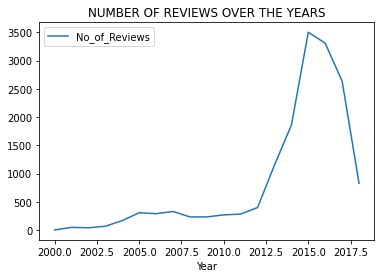

In [45]:
#Plot the graph to know the variation in number of reviews generated based on years. That helps analyse the statistics easily
plt.figure(figsize=(5,6))
Yearly.plot(x="Year",y="No_of_Reviews",kind="line",title="NUMBER OF REVIEWS OVER THE YEARS")
plt.show()

In [46]:
#Plot the graph to know the variation in number of reviews generated based on months. That helps analyse the statistics easily
plt.figure(figsize=(5,6))
Yearly.plot(x="Month",y="No_of_Reviews",kind="line",title="NUMBER OF REVIEWS OVER THE YEARS")
plt.show()

KeyError: ignored

<Figure size 360x432 with 0 Axes>